# Advanced Lane Finding

## Finding corners

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
calibration_path = './camera_cal'

In [ ]:
# Read in calibration image
img = mpimg.imread(calibration_path + '/calibration2.jpg')
plt.imshow(img)

In [ ]:
# Arrayys to store object points and image points form all images

nx = 9 # number of corners in x
ny = 6 # number of corners in y

obj_points = [] # 3D points in real world space
img_points = [] # 2D points in image plane

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ..., (7,5,0)
obj_p = np.zeros((ny*nx, 3), np.float32)
obj_p[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2) # x, y coordinates

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

# If corers are found, add objects points, image points
if ret == True:
    img_points.append(corners)
    obj_points.append(obj_p)
    
    # draw and display corners
    img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
    plt.imshow(img)

### Iterate through all calibration images

In [ ]:
import glob

In [ ]:
images = glob.glob(calibration_path + '/calibration*.jpg')

In [ ]:
for fname in images:
    # read each mage
    img = mpimg.imread(fname)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If corers are found, add objects points, image points
    if ret == True:
        img_points.append(corners)
        obj_points.append(obj_p)

        # draw and display corners
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        plt.imshow(img)

## Correction for Distortion

In [ ]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('camera_cal/calibration9.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

## Perspective Transform

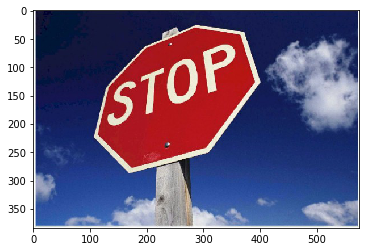

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# read and display the original image
img = mpimg.imread('./images/stopsign.jpg')

plt.imshow(img)

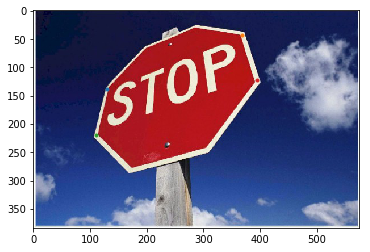

In [14]:
plt.imshow(img)

plt.plot(130, 138, '.')
plt.plot(368, 43, '.')
plt.plot(110, 220, '.')
plt.plot(395, 123, '.')

In [15]:
# Define perspective transform function
def warp(img):
    
    # Define calibration box in source (original) and destination (dsired or warped) coordinates
    
    img_size = (img.shape[1], img.shape[0])
    
    # Four source coordinates
    src = np.float32(
        [[130, 138],
         [368,  43],
         [110, 220],
         [395, 123]])
    
    # Four desired coordinates
    dst = np.float32(
        [[130, 150],
         [350, 150],
         [130, 250],
         [350, 250]])
    
    # Compute the perspective transform, M
    M = cv2.getPerspectiveTransform(src, dst)
    
    # Could compute the inverse also by swapping the input parameters
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    # Create warped image - uses linera interpolation
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

In [ ]:
# Get perspective transform
warped_im = warp(img)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('Source image')
ax1.imshow(img)
ax2.